In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, levene, shapiro, iqr,mannwhitneyu
from statsmodels.stats.power import ttest_power
import numpy as np
%matplotlib inline

In [2]:
import scipy
import math

In [3]:
golf_df=pd.read_excel('SM4-Golf.xls')

In [4]:
golf_df.shape

(40, 2)

In [5]:
golf_df

,Current,New
0,264,277
1,261,269
2,267,263
3,272,266
4,258,262
5,283,251
6,258,262
7,266,289
8,259,286
9,270,264


In [6]:
#the data set is independent dataset as both the samples are subjected to same test and we can get 2 diff samples from the data set
golf_df.describe()


,Current,New
count,40.000000,40.000000
mean,270.275000,267.500000
std,8.752985,9.896904
min,255.000000,250.000000
25%,263.000000,262.000000
50%,270.000000,265.000000
75%,275.250000,274.500000
max,289.000000,289.000000


In [7]:
#µ0(null hypothesis) is  average of distance covered by current golf ball ==  average of distance covered by new golf ball
#µ1(alternate hypothesis) is  average of distance covered by current golf ball !=  average of distance covered by new golf ball

In [8]:
#get 2 different samples from dataset
current_val=golf_df.Current
new_val=golf_df.New

(array([3., 4., 7., 5., 2., 9., 2., 3., 3., 2.]),
 array([255. , 258.4, 261.8, 265.2, 268.6, 272. , 275.4, 278.8, 282.2,
        285.6, 289. ]),
 <a list of 10 Patch objects>)

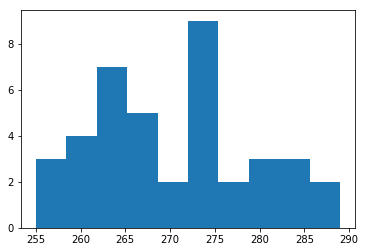

In [9]:
    plt.hist(current_val)

{'boxes': [<matplotlib.lines.Line2D at 0x21abb821c18>],
 'caps': [<matplotlib.lines.Line2D at 0x21abb82a668>,
 'fliers': [<matplotlib.lines.Line2D at 0x21abb834320>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x21abb82aeb8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x21abb821d68>,
  <matplotlib.lines.Line2D at 0x21abb82a240>]}

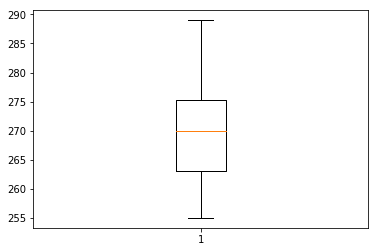

In [10]:
plt.boxplot(current_val)

(array([ 4.,  1.,  4., 11.,  5.,  3.,  4.,  5.,  1.,  2.]),
 array([250. , 253.9, 257.8, 261.7, 265.6, 269.5, 273.4, 277.3, 281.2,
        285.1, 289. ]),
 <a list of 10 Patch objects>)

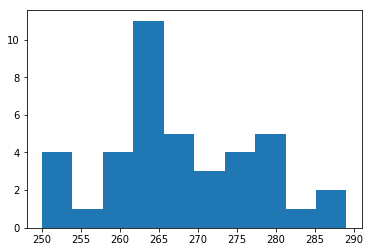

In [11]:
plt.hist(new_val)

{'boxes': [<matplotlib.lines.Line2D at 0x21abb911518>],
 'caps': [<matplotlib.lines.Line2D at 0x21abb911f28>,
 'fliers': [<matplotlib.lines.Line2D at 0x21abb918be0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x21abb9187b8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x21abb911668>,
  <matplotlib.lines.Line2D at 0x21abb911b00>]}

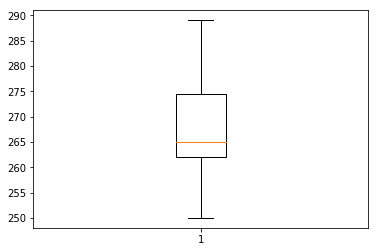

In [12]:
plt.boxplot(new_val)

In [13]:
#p values greater than 0.05 percent so current_val is normally distributed
shapiro(current_val)

(0.9707046747207642, 0.378787100315094)

In [14]:
#p values greater than 0.05 percent so new_val is normally distributed
shapiro(new_val)

(0.9678263664245605, 0.3064655363559723)

In [15]:
##p values greater than 0.05 percent so population variances are equal
levene(current_val,new_val)

LeveneResult(statistic=0.2553238291765741, pvalue=0.6147759523331309)

In [16]:
t,p=ttest_ind(current_val,new_val)

In [17]:
#since p value is greater than 0.05, accept NULL hypothesis i.e average distances travelled by both the samples are equal
print(t,p)

1.3283615935245678 0.18793228491854663


In [18]:
#since p value is greater than 0.05, accept NULL hypothesis
nt,np=mannwhitneyu(current_val,new_val)
print(nt,np)

668.0 0.10265192122893124


In [19]:
mean_current=current_val.mean()
mean_new=new_val.mean()
print(mean_current,mean_new)

270.275 267.5


In [20]:
std_current=current_val.std()
std_new=new_val.std()
print(std_current,std_new)

8.752984838884597 9.896904462947894


In [21]:
d=mean_current-mean_new
print(d)


2.7749999999999773


In [22]:
s_pooled=math.sqrt(((std_current**2)+(std_new**2))/2)

In [23]:
s_pooled

9.342469200871404

In [24]:
d/s_pooled

0.2970306821820877

In [26]:
#calculate power of test
print(ttest_power(0.297,nobs=40,alpha=0.05,alternative='two-sided'))


0.4491993811704459


In [28]:
#the power of the test is very low. Hence there are more chances of occurring typeII error. No clear demarcation between Null and alternate Hypothesis
#The hyporthesis on sample size of 40  states that accept NULL hypothesis but the power of test is weak which is not enough to directly accept the NULL hypothesis
#Hence more number of samples would be needed

In [29]:
#function to return sample size for given power of test
def sample_power_difftest(d,s,power=0.8,sig=0.05):
    z=scipy.stats.norm.isf([sig/2])
    zp=-1*scipy.stats.norm.isf([power])
    n=(2*(s**2)) * ((zp+z)**2) /(d**2)
    return int(round(n[0]))

In [30]:
samples_req=sample_power_difftest(d,s_pooled,0.8,0.05)

In [31]:
#178 sample size will be required  to obtain atleast 80% power of test
print(samples_req)

178


In [33]:
#The above statistics result concludes that with 40 sample size, power of test is 44.91% which is very low to accept the NULL hypothesis.
#Hence more samples(178) would be required to compare the average distances travelled by current and new golf ball.